***1st Answer***

a. Using Support vector machine (SVM) for classification (use scikit).


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('music.csv')
df.head()


Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0  relax            0.052            0.591              9.136      130.043   
1  relax            0.125            0.439              6.680      142.240   
2  relax            0.046            0.639             10.578      188.154   
3  relax            0.135            0.603             10.442       65.991   
4  relax            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
0         3.997         0.363         0.887         0.078         0.221  ...   
1         4.058         0.516         0.785         0.397         0.556  ...   
2         2.775         0.903         0.502         0.329         0.287  ...   
3         2.841         1.552         0.612         0.351         0.011  ...   
4         3.217         0.228         0.814         0.096         0.434  ...   

   _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0               0.426                1.000                0.008   
1               0.002                1.000                0.000   
2               0.184                0.746                0.016   
3               0.038                1.000                0.161   
4               0.004                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  
0                                           0.970  
1                                           0.967  
2                                           0.963  
3                                           0.968  
4                                           0.957  

[5 rows x 51 columns]

<ipython-input-50-4f8b3293f8c7>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Correlation')

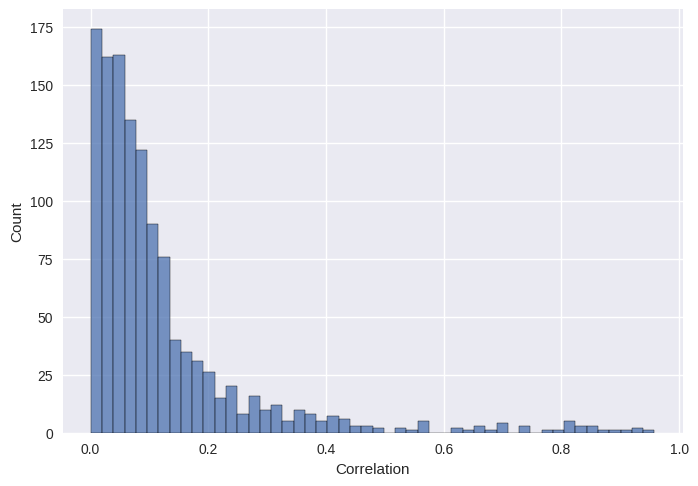

In [50]:
#droping duplicate rows
data = df.drop_duplicates()
data.isnull().any().sum()
data.Class.value_counts(normalize=True)
data_lr_corr = data.select_dtypes('number').corr()
trils = zip(*(np.tril_indices_from(data_lr_corr)))

for x,y in trils:
    data_lr_corr.iloc[x,y] = np.NaN

data_lr_corr = data_lr_corr.stack().to_frame().reset_index().rename(columns={'level_0':'feature_1','level_1':'feature_2',0:'corr'})
data_lr_corr['corr'] = data_lr_corr['corr'].abs()
data_lr_corr.sort_values(by = 'corr', ascending= False).reset_index(drop = True)

plt.style.use('seaborn')
sns.histplot(data_lr_corr['corr'], bins = 50)
plt.xlabel('Correlation')

***2nd Answer***

b. Printing confusion matrix and report Accuracy, precision, F1 score and recall.

In [51]:
X = data.drop('Class', axis = 1)
y = data.loc[:,'Class']

# Spliting data in to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.538


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision, recall, and F1 score with macro average
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Printing confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Printing accuracy, precision, recall, and F1 score
print("\nAccuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))


Confusion Matrix:
[[ 8  2  1  5]
 [ 1 11  0  5]
 [ 5  1 10  6]
 [ 5  3  2 13]]

Accuracy: 0.538
Precision: 0.571
Recall: 0.542
F1 Score: 0.544


***3rd Answer***

C. Applying any pre-processing techniques and report if results are improving.


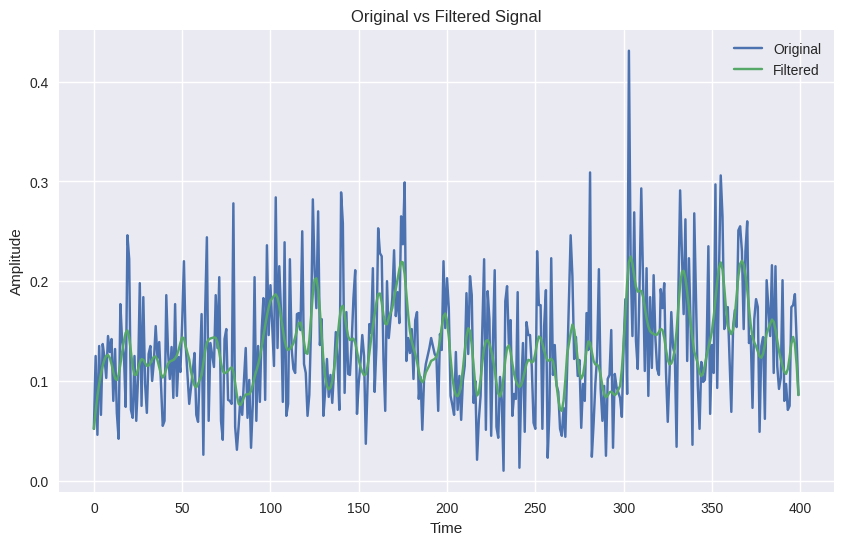

In [53]:
import scipy
def butterworth_filter(data, cutoff_freq, fs, btype='low', order=2):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = scipy.signal.butter(order, normal_cutoff, btype=btype, analog=False)
    filtered_data = scipy.signal.filtfilt(b, a, data)
    return filtered_data

# Specifying cutoff frequency and sampling frequency
cutoff_freq = 10  # Adjust as needed
fs = 100  # Adjust as needed

# Applying Butterworth filter to each feature in X
filtered_X = X.apply(lambda col: butterworth_filter(col, cutoff_freq, fs), axis=0)

plt.figure(figsize=(10, 6))
plt.plot(X.iloc[:, 0], label='Original')
plt.plot(filtered_X.iloc[:, 0], label='Filtered')
plt.title('Original vs Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

***4th Answer***

d. Comparing results of SVM with neural network. Report results.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_X, y, test_size=0.2, random_state=42)

# Initializing SVM classifier
svm_clf = SVC(kernel='linear')

# Train the classifier
svm_clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy, f"{round(accuracy*100,2)}%")

from sklearn.neural_network import MLPClassifier

# Initializing the neural network classifier
nn_clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Training the neural network classifier
nn_clf.fit(X_train, y_train)

# Predicting on the test set
nn_y_pred = nn_clf.predict(X_test)

# Calculating accuracy of the neural network classifier
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("Neural Network Testing Accuracy:", nn_accuracy,f"{round(nn_accuracy*100,2)}%")


Accuracy: 0.9743589743589743 97.44%
Neural Network Testing Accuracy: 0.8205128205128205 82.05%
